<h1><center>Building and Visualizing a Decision Tree Classifier for the Titanic Dataset</center></h1>


In [68]:
# Import Pandas, Scikit-learn, Graphviz modules 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pandas as pd
import pydotplus
from IPython.display import Image

In [69]:
# Import Titanic dataset
data = pd.read_csv('http://localhost/datasets/titanic.csv')
# Check the first 5 entries
data.head(5)

,Pclass,Sex,Age,Survived,Name,Ticket,Cabin,Selected
0,continuous,discrete,continuous,discrete,string,string,string,discrete
1,NaN,NaN,NaN,class,meta,meta,meta,meta
2,3.0,male,22.0,0,"Braund, Mr. Owen Harris",A/5 21171,NaN,No
3,1.0,female,38.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,No
4,3.0,female,26.0,1,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,No


In [70]:
# Convert Male and Female into binary values of 0 and 1.
data.Sex[data.Sex == 'male'] = 1
data.Sex[data.Sex == 'female'] = 0
print(data)

         Pclass       Sex         Age  Survived  \
0    continuous  discrete  continuous  discrete   
1           NaN       NaN         NaN     class   
2           3.0         1        22.0         0   
3           1.0         0        38.0         1   
4           3.0         0        26.0         1   
..          ...       ...         ...       ...   
888         2.0         1        27.0         0   
889         1.0         0        19.0         1   
890         3.0         0         NaN         0   
891         1.0         1        26.0         1   
892         3.0         1        32.0         0   

                                                  Name            Ticket  \
0                                               string            string   
1                                                 meta              meta   
2                              Braund, Mr. Owen Harris         A/5 21171   
3    Cumings, Mrs. John Bradley (Florence Briggs Th...          PC 17599   
4      

In [71]:
# Check the first 5 items.
data.head(5)

,Pclass,Sex,Age,Survived,Name,Ticket,Cabin,Selected
0,continuous,discrete,continuous,discrete,string,string,string,discrete
1,NaN,NaN,NaN,class,meta,meta,meta,meta
2,3.0,1,22.0,0,"Braund, Mr. Owen Harris",A/5 21171,NaN,No
3,1.0,0,38.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,No
4,3.0,0,26.0,1,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,No


In [72]:
# Check frame structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 8 columns):
Pclass      892 non-null object
Sex         892 non-null object
Age         715 non-null object
Survived    893 non-null object
Name        893 non-null object
Ticket      893 non-null object
Cabin       206 non-null object
Selected    893 non-null object
dtypes: object(8)
memory usage: 55.9+ KB


In [74]:
# Check number of rows and columns
data.shape

(893, 8)

In [55]:
# Slice the frame into selected features and target variable 
data=data.loc[1:,'Pclass':'Survived'] 
data.head(5)

,Pclass,Sex,Age,Survived
1,NaN,NaN,NaN,class
2,3.0,1,22.0,0
3,1.0,0,38.0,1
4,3.0,0,26.0,1
5,1.0,0,35.0,1


In [56]:
# Check null values
data.isnull().sum()

Pclass        1
Sex           1
Age         178
Survived      0
dtype: int64

In [57]:
# Clean up by dropping the null entries
dataset = data.dropna()

In [58]:
# Ensure it is cleaned.
dataset.isnull().sum()

Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64

In [59]:
# Check first 5 entries
dataset.head(5)

,Pclass,Sex,Age,Survived
2,3.0,1,22.0,0
3,1.0,0,38.0,1
4,3.0,0,26.0,1
5,1.0,0,35.0,1
6,3.0,1,35.0,0


In [60]:
# Define x (features) and y (label/classifier)
x = dataset.iloc[:,:-1].values
y = dataset['Survived']

In [61]:
# Split the dataset into traning and testing sets (20% for testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=27)

In [75]:
# Training/fitting the  model with the Decision Tree Classifier
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
# Define the feature and target variable names for displaying in the tree
titanic_feature_names = ['PClass',
 'Sex',
 'Age']
titanic_target_names = ['Survived', 'Diseased']

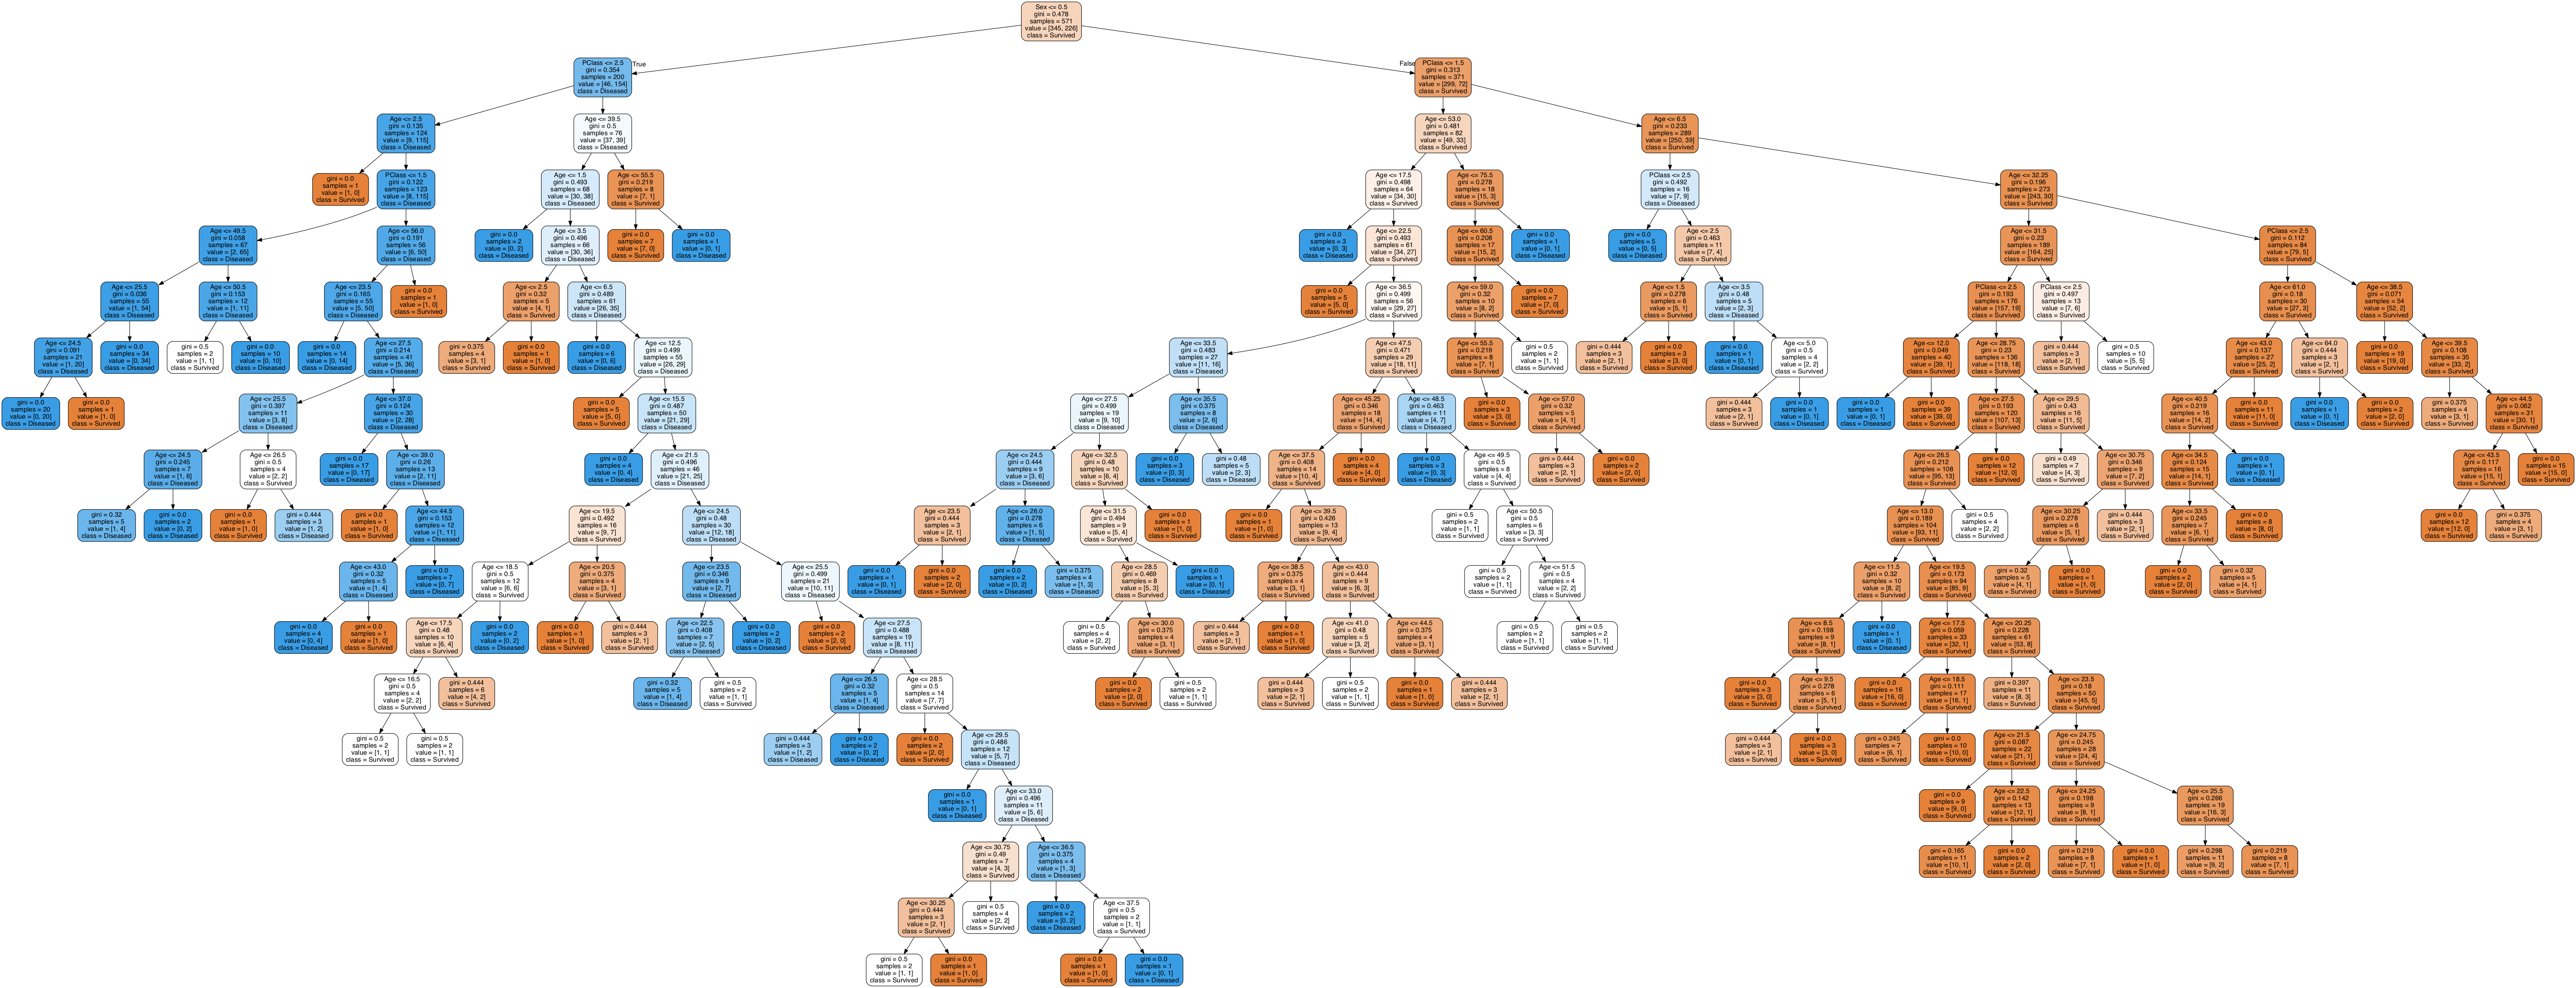

In [77]:
# Generate the tree
dot_data = tree.export_graphviz(tree_model, out_file=None,
                               feature_names=titanic_feature_names,
                               class_names=titanic_target_names,
                               rounded=True, filled=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

In [66]:
# Evaluating the model by using the trained model against the testing dataset
clf_prediction = tree_model.predict(x_test)

In [67]:
# Display the accuarcy score
print(accuracy_score(clf_prediction, y_test))

0.7972027972027972


<h1><center>Adding the other models</center></h1>


In [79]:
# Import Pandas, Scikit-learn, Graphviz modules 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pandas as pd
import pydotplus
from IPython.display import Image
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neibour Algorithm
from sklearn.naive_bayes import GaussianNB         # Gaussian Naive Bayes Algorithm
from sklearn.svm import SVC                        # Support Vector Machine Algorithm
from sklearn.ensemble import RandomForestClassifier # Random Algorithm

In [80]:
# Import Titanic dataset
data = pd.read_csv('http://localhost/datasets/titanic.csv')
# Check the first 5 entries
data.head(5)

,Pclass,Sex,Age,Survived,Name,Ticket,Cabin,Selected
0,continuous,discrete,continuous,discrete,string,string,string,discrete
1,NaN,NaN,NaN,class,meta,meta,meta,meta
2,3.0,male,22.0,0,"Braund, Mr. Owen Harris",A/5 21171,NaN,No
3,1.0,female,38.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,No
4,3.0,female,26.0,1,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,No


In [81]:
# Convert Male and Female into binary values of 0 and 1.
data.Sex[data.Sex == 'male'] = 1
data.Sex[data.Sex == 'female'] = 0
print(data)

         Pclass       Sex         Age  Survived  \
0    continuous  discrete  continuous  discrete   
1           NaN       NaN         NaN     class   
2           3.0         1        22.0         0   
3           1.0         0        38.0         1   
4           3.0         0        26.0         1   
..          ...       ...         ...       ...   
888         2.0         1        27.0         0   
889         1.0         0        19.0         1   
890         3.0         0         NaN         0   
891         1.0         1        26.0         1   
892         3.0         1        32.0         0   

                                                  Name            Ticket  \
0                                               string            string   
1                                                 meta              meta   
2                              Braund, Mr. Owen Harris         A/5 21171   
3    Cumings, Mrs. John Bradley (Florence Briggs Th...          PC 17599   
4      

In [82]:
# Check the first 5 items.
data.head(5)

,Pclass,Sex,Age,Survived,Name,Ticket,Cabin,Selected
0,continuous,discrete,continuous,discrete,string,string,string,discrete
1,NaN,NaN,NaN,class,meta,meta,meta,meta
2,3.0,1,22.0,0,"Braund, Mr. Owen Harris",A/5 21171,NaN,No
3,1.0,0,38.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,No
4,3.0,0,26.0,1,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,No


In [83]:
# Slice the frame into selected features and target variable 
data=data.loc[1:,'Pclass':'Survived'] 
data.head(5)

,Pclass,Sex,Age,Survived
1,NaN,NaN,NaN,class
2,3.0,1,22.0,0
3,1.0,0,38.0,1
4,3.0,0,26.0,1
5,1.0,0,35.0,1


In [84]:
# Check null values
data.isnull().sum()

Pclass        1
Sex           1
Age         178
Survived      0
dtype: int64

In [85]:
# Ensure it is cleaned.
dataset.isnull().sum()

Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64

In [86]:
# Check first 5 entries
dataset.head(5)

,Pclass,Sex,Age,Survived
2,3.0,1,22.0,0
3,1.0,0,38.0,1
4,3.0,0,26.0,1
5,1.0,0,35.0,1
6,3.0,1,35.0,0


In [87]:
# Define x (features) and y (label/classifier)
x = dataset.iloc[:,:-1].values
y = dataset['Survived']

In [88]:
# Split the dataset into traning and testing sets (20% for testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=27)

In [90]:
# Training/Fitting with Different Classifiers Setup
# Decision Tree Classifier
tree_model = tree.DecisionTreeClassifier()
# Support Vector Machine Classifier
SVC_model = SVC(gamma='scale')
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)
# KNN_model = KNeighborsClassifier(algorithm='scale', leaf_size=30, metric='minkowski',
#                     metric_params=None, n_jobs=None, n_neighbors=5, p=2)
# Gaussian Naiive Bayne model
GNB_model = GaussianNB()
# Random Forest
# Create the model with 100 trees
RF_model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [91]:
# Start training/fitting
tree_model.fit(x_train,y_train)
SVC_model.fit(x_train, y_train)
KNN_model.fit(x_train, y_train)
GNB_model.fit(x_train, y_train)
RF_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
# Training completed. Use models to predict with the test data and store the outcome
SVC_prediction = SVC_model.predict(x_test)
KNN_prediction = KNN_model.predict(x_test)
GNB_prediction = GNB_model.predict(x_test)
TREE_prediction = tree_model.predict(x_test)
RF_prediction = RF_model.predict(x_test)

In [95]:
# Accuracy score is the simplest way to evaluate
print("SVC")
print(accuracy_score(SVC_prediction, y_test))
print("KNN")
print(accuracy_score(KNN_prediction, y_test))
print("GNB")
print(accuracy_score(GNB_prediction, y_test))
print("TREE")
print(accuracy_score(TREE_prediction, y_test))
print("RF")
print(accuracy_score(RF_prediction, y_test))

SVC
0.6083916083916084
KNN
0.8041958041958042
GNB
0.7272727272727273
TREE
0.7972027972027972
RF
0.8181818181818182


<h1><center>Building and Visualizing a Linear Regression Model</center></h1>


In [96]:
# Import Pandas, Matpolib, Numpy, and Scikit-learn modules
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [97]:
# Import dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('http://localhost/datasets/housing.csv', header=None, delimiter=r"\s+", names=column_names)
# Check the first 5 entries
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [98]:
# Display number of rows and columns
print(np.shape(data))

(506, 14)


In [99]:
# Descriptive statistics of features
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [100]:
# Define x (feature) and y (target variable) for checking correlation
x = pd.DataFrame(data, columns = ['LSTAT'])
y = data['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [101]:
# Training and fitting the model
reg_model=linear_model.LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
# Calculate Regression Coefficient of the Slope
reg_model.coef_

array([-0.91776513])

In [103]:
# Calculate Y-Intercept 
reg_model.intercept_

34.03484776682165

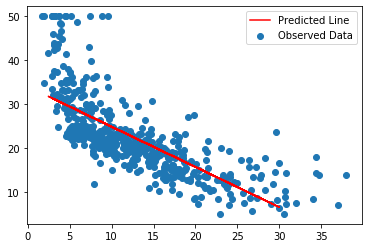

In [104]:
# Display scatter plot to fit the line
a=reg_model.predict(x_test[:None])
plt.scatter(x,y)
plt.plot(x_test,a,'r')
plt.legend(['Predicted Line','Observed Data'])
plt.show()

In [105]:
# Mean Square Error (MSE)
np.mean((a-y_test)**2)

40.13019759337232

<h1><center>Building a Fake News Classifier & Deploying it Using Flask</center></h1>
<a href="https://medium.com/analytics-vidhya/building-a-fake-news-classifier-deploying-it-using-flask-6aac31dfe31d" target="_blank">Article</a>
<a href="https://github.com/ravidahiya74/Fake-news-detection" target="_blank">Github link</a>
<a href="https://ravi-finds-fake-news.herokuapp.com/" target="_blank">Demo Site</a>
<ol>
     <li><a href="https://www.dailydot.com/debug/fake-news-sites-list-facebook/" target="_blank">Fake News Site Listing</a></li>
    <li><a href="https://www.bostonleader.com/children-in-central-america-may-be-reunited-with-their-parents-in-the-u-s/" target="_blank">1st Fake News</a></li>
    <li><a href="https://entertainment.theonion.com/you-ve-served-me-well-but-this-has-gone-too-far-says-1842924183" target="_blank">1st Fake News</a></li>
    <li><a href="https://edition.cnn.com/world/live-news/coronavirus-pandemic-04-18-20-intl/h_fe5aa8112b7dbd43a6cb6595b9b8e3c9" target="_blank">1st Real News</a></li>
</ol>

In [108]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

#Importing the cleaned file containing the text and label
news = pd.read_csv('news.csv')
X = news['text']
y = news['label']

In [109]:
#Splitting the data into train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Creating a pipeline that first creates bag of words(after applying stopwords) & then applies Multinomial Naive Bayes model
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                    ('nbmodel', MultinomialNB())])

#Training our data
pipeline.fit(X_train, y_train)

#Predicting the label for the test data
pred = pipeline.predict(X_test)

In [110]:
#Splitting the data into train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Creating a pipeline that first creates bag of words(after applying stopwords) & then applies Multinomial Naive Bayes model
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                    ('nbmodel', MultinomialNB())])

#Training our data
pipeline.fit(X_train, y_train)

#Predicting the label for the test data
pred = pipeline.predict(X_test)

In [111]:
#Checking the performance of our model
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

#Serialising the file
with open('model.pickle', 'wb') as handle:
    pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

              precision    recall  f1-score   support

        FAKE       0.98      0.70      0.82       655
        REAL       0.75      0.98      0.85       612

    accuracy                           0.84      1267
   macro avg       0.87      0.84      0.83      1267
weighted avg       0.87      0.84      0.83      1267

[[458 197]
 [ 10 602]]
